## Installing packages

In [ ]:
install.packages('caret')
install.packages('gbm')
install.packages('C50')
install.packages('dplyr')
install.packages('kernlab')
library('kernlab')
library('dplyr')
library('caret')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘libcoin’, ‘mvtnorm’, ‘Formula’, ‘inum’, ‘Cubist’, ‘partykit’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

   

In [ ]:
df <- read.csv('/content/finalDataset.csv.xls')
glimpse(df)

Rows: 13,508
Columns: 51
$ SEQN                        <int> 82572, 12207, 40020, 51396, 73647, 47224, …
$ Gender                      <int> 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, …
$ Age                         <int> 67, 38, 20, 76, 67, 59, 80, 41, 32, 26, 56…
$ Annual.Family.Income        <int> 8, 8, 9, 8, 4, 5, 6, 8, 8, 15, 3, 2, 8, 7,…
$ Ratio.Family.Income.Poverty <dbl> 4.00, 2.27, 3.10, 3.92, 1.21, 1.39, 1.87, …
$ X60.sec.pulse               <int> 50, 88, 58, 88, 58, 84, 60, 76, 74, 70, 66…
$ Systolic                    <int> 122, 117, 104, 114, 146, 126, 124, 155, 10…
$ Diastolic                   <int> 82, 68, 50, 0, 52, 74, 68, 110, 64, 62, 81…
$ Weight                      <dbl> 67.8, 138.3, 66.5, 86.9, 92.6, 110.0, 51.8…
$ Height                      <dbl> 163.7, 169.0, 175.0, 169.0, 158.4, 170.4, …
$ Body.Mass.Index             <dbl> 22.50, 48.42, 21.71, 30.43, 36.67, 37.88, …
$ White.Blood.Cells           <dbl> 7.2, 9.3, 7.1, 5.3, 8.1, 12.5, 5.4, 8.2, 5…
$ Lymphocyte   

## Splitting the data

In [ ]:
set.seed(123)
train_index <- createDataPartition(df$CoronaryHeartDisease, times = 1, p = 0.75, list = FALSE)
train_data <- df[train_index, ] %>% glimpse

Rows: 10,131
Columns: 51
$ SEQN                        <int> 82572, 12207, 40020, 73647, 47224, 92974, …
$ Gender                      <int> 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, …
$ Age                         <int> 67, 38, 20, 67, 59, 80, 32, 26, 56, 76, 73…
$ Annual.Family.Income        <int> 8, 8, 9, 4, 5, 6, 8, 15, 3, 2, 8, 7, 10, 1…
$ Ratio.Family.Income.Poverty <dbl> 4.00, 2.27, 3.10, 1.21, 1.39, 1.87, 3.28, …
$ X60.sec.pulse               <int> 50, 88, 58, 58, 84, 60, 74, 70, 66, 56, 56…
$ Systolic                    <int> 122, 117, 104, 146, 126, 124, 100, 100, 14…
$ Diastolic                   <int> 82, 68, 50, 52, 74, 68, 64, 62, 81, 60, 75…
$ Weight                      <dbl> 67.8, 138.3, 66.5, 92.6, 110.0, 51.8, 79.7…
$ Height                      <dbl> 163.7, 169.0, 175.0, 158.4, 170.4, 164.1, …
$ Body.Mass.Index             <dbl> 22.50, 48.42, 21.71, 36.67, 37.88, 19.20, …
$ White.Blood.Cells           <dbl> 7.2, 9.3, 7.1, 8.1, 12.5, 5.4, 5.7, 6.0, 8…
$ Lymphocyte   

In [ ]:
test_data <- df[-train_index, ] %>% glimpse()

Rows: 3,377
Columns: 51
$ SEQN                        <int> 51396, 18141, 2144, 44959, 17003, 10362, 6…
$ Gender                      <int> 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, …
$ Age                         <int> 76, 41, 63, 78, 65, 42, 57, 46, 69, 74, 52…
$ Annual.Family.Income        <int> 8, 8, 7, 8, 10, 3, 4, 6, 6, 8, 15, 2, 2, 7…
$ Ratio.Family.Income.Poverty <dbl> 3.92, 4.19, 3.16, 4.19, 5.00, 1.08, 0.92, …
$ X60.sec.pulse               <int> 88, 76, 70, 76, 70, 70, 56, 78, 42, 56, 52…
$ Systolic                    <int> 114, 155, 152, 120, 132, 99, 143, 126, 161…
$ Diastolic                   <int> 0, 110, 71, 56, 76, 69, 81, 70, 87, 70, 70…
$ Weight                      <dbl> 86.9, 94.3, 78.2, 101.9, 78.7, 66.0, 61.7,…
$ Height                      <dbl> 169.0, 169.4, 160.6, 176.9, 178.4, 158.7, …
$ Body.Mass.Index             <dbl> 30.43, 32.86, 30.32, 34.01, 26.39, 26.21, …
$ White.Blood.Cells           <dbl> 5.3, 8.2, 7.6, 7.0, 6.4, 8.2, 8.9, 9.6, 6.…
$ Lymphocyte    

## Training parameters

In [ ]:
trainControl <- trainControl(method="repeatedcv", number=10, repeats=3, verboseIter = TRUE)
metric <- "Accuracy"
train_data$CoronaryHeartDisease <- as.factor(train_data$CoronaryHeartDisease)
test_data$CoronaryHeartDisease <- as.factor(test_data$CoronaryHeartDisease)

## Treebag

In [ ]:
set.seed(7)
fit.treebag <- train(CoronaryHeartDisease~., data = train_data, method = "treebag", metric = metric,trControl = trainControl)

+ Fold01.Rep1: parameter=none 
- Fold01.Rep1: parameter=none 
+ Fold02.Rep1: parameter=none 
- Fold02.Rep1: parameter=none 
+ Fold03.Rep1: parameter=none 
- Fold03.Rep1: parameter=none 
+ Fold04.Rep1: parameter=none 
- Fold04.Rep1: parameter=none 
+ Fold05.Rep1: parameter=none 
- Fold05.Rep1: parameter=none 
+ Fold06.Rep1: parameter=none 
- Fold06.Rep1: parameter=none 
+ Fold07.Rep1: parameter=none 
- Fold07.Rep1: parameter=none 
+ Fold08.Rep1: parameter=none 
- Fold08.Rep1: parameter=none 
+ Fold09.Rep1: parameter=none 
- Fold09.Rep1: parameter=none 
+ Fold10.Rep1: parameter=none 
- Fold10.Rep1: parameter=none 
+ Fold01.Rep2: parameter=none 
- Fold01.Rep2: parameter=none 
+ Fold02.Rep2: parameter=none 
- Fold02.Rep2: parameter=none 
+ Fold03.Rep2: parameter=none 
- Fold03.Rep2: parameter=none 
+ Fold04.Rep2: parameter=none 
- Fold04.Rep2: parameter=none 
+ Fold05.Rep2: parameter=none 
- Fold05.Rep2: parameter=none 
+ Fold06.Rep2: parameter=none 
- Fold06.Rep2: parameter=none 
+ Fold07

In [ ]:
predictions <- predict(fit.treebag, newdata = test_data)
conf_matrix <- confusionMatrix(predictions, reference = test_data$CoronaryHeartDisease)
conf_matrix

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1358  183
         1  329 1507
                                          
               Accuracy : 0.8484          
                 95% CI : (0.8358, 0.8603)
    No Information Rate : 0.5004          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6967          
                                          
 Mcnemar's Test P-Value : 1.473e-10       
                                          
            Sensitivity : 0.8050          
            Specificity : 0.8917          
         Pos Pred Value : 0.8812          
         Neg Pred Value : 0.8208          
             Prevalence : 0.4996          
         Detection Rate : 0.4021          
   Detection Prevalence : 0.4563          
      Balanced Accuracy : 0.8483          
                                          
       'Positive' Class : 0               
                        

## Stochastic Gradient Boosting (GBM)

In [ ]:
set.seed(7)
fit.gbm <- train(CoronaryHeartDisease~., data = train_data, method = "gbm",metric = metric,trControl = trainControl, verbose = FALSE)

+ Fold01.Rep1: shrinkage=0.1, interaction.depth=1, n.minobsinnode=10, n.trees=150 
- Fold01.Rep1: shrinkage=0.1, interaction.depth=1, n.minobsinnode=10, n.trees=150 
+ Fold01.Rep1: shrinkage=0.1, interaction.depth=2, n.minobsinnode=10, n.trees=150 
- Fold01.Rep1: shrinkage=0.1, interaction.depth=2, n.minobsinnode=10, n.trees=150 
+ Fold01.Rep1: shrinkage=0.1, interaction.depth=3, n.minobsinnode=10, n.trees=150 
- Fold01.Rep1: shrinkage=0.1, interaction.depth=3, n.minobsinnode=10, n.trees=150 
+ Fold02.Rep1: shrinkage=0.1, interaction.depth=1, n.minobsinnode=10, n.trees=150 
- Fold02.Rep1: shrinkage=0.1, interaction.depth=1, n.minobsinnode=10, n.trees=150 
+ Fold02.Rep1: shrinkage=0.1, interaction.depth=2, n.minobsinnode=10, n.trees=150 
- Fold02.Rep1: shrinkage=0.1, interaction.depth=2, n.minobsinnode=10, n.trees=150 
+ Fold02.Rep1: shrinkage=0.1, interaction.depth=3, n.minobsinnode=10, n.trees=150 
- Fold02.Rep1: shrinkage=0.1, interaction.depth=3, n.minobsinnode=10, n.trees=150 
+ Fo

In [ ]:
predictions <- predict(fit.gbm, newdata = test_data)
conf_matrix <- confusionMatrix(predictions, reference = test_data$CoronaryHeartDisease)
conf_matrix

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1377  203
         1  310 1487
                                        
               Accuracy : 0.8481        
                 95% CI : (0.8355, 0.86)
    No Information Rate : 0.5004        
    P-Value [Acc > NIR] : < 2.2e-16     
                                        
                  Kappa : 0.6962        
                                        
 Mcnemar's Test P-Value : 2.869e-06     
                                        
            Sensitivity : 0.8162        
            Specificity : 0.8799        
         Pos Pred Value : 0.8715        
         Neg Pred Value : 0.8275        
             Prevalence : 0.4996        
         Detection Rate : 0.4078        
   Detection Prevalence : 0.4679        
      Balanced Accuracy : 0.8481        
                                        
       'Positive' Class : 0             
                                        

## C5.0

In [ ]:
set.seed(7)
fit.c50 <- train(CoronaryHeartDisease~., data = train_data, method = "C5.0", metric = metric,trControl =trainControl)

+ Fold01.Rep1: model=tree, winnow=FALSE, trials=20 
- Fold01.Rep1: model=tree, winnow=FALSE, trials=20 
+ Fold01.Rep1: model=tree, winnow= TRUE, trials=20 
- Fold01.Rep1: model=tree, winnow= TRUE, trials=20 
+ Fold01.Rep1: model=rules, winnow=FALSE, trials=20 
- Fold01.Rep1: model=rules, winnow=FALSE, trials=20 
+ Fold01.Rep1: model=rules, winnow= TRUE, trials=20 
- Fold01.Rep1: model=rules, winnow= TRUE, trials=20 
+ Fold02.Rep1: model=tree, winnow=FALSE, trials=20 
- Fold02.Rep1: model=tree, winnow=FALSE, trials=20 
+ Fold02.Rep1: model=tree, winnow= TRUE, trials=20 
- Fold02.Rep1: model=tree, winnow= TRUE, trials=20 
+ Fold02.Rep1: model=rules, winnow=FALSE, trials=20 
- Fold02.Rep1: model=rules, winnow=FALSE, trials=20 
+ Fold02.Rep1: model=rules, winnow= TRUE, trials=20 
- Fold02.Rep1: model=rules, winnow= TRUE, trials=20 
+ Fold03.Rep1: model=tree, winnow=FALSE, trials=20 
- Fold03.Rep1: model=tree, winnow=FALSE, trials=20 
+ Fold03.Rep1: model=tree, winnow= TRUE, trials=20 
- Fo

In [ ]:
predictions <- predict(fit.c50, newdata = test_data)
conf_matrix <- confusionMatrix(predictions, reference = test_data$CoronaryHeartDisease)
conf_matrix

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1352  144
         1  335 1546
                                          
               Accuracy : 0.8582          
                 95% CI : (0.8459, 0.8698)
    No Information Rate : 0.5004          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7163          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.8014          
            Specificity : 0.9148          
         Pos Pred Value : 0.9037          
         Neg Pred Value : 0.8219          
             Prevalence : 0.4996          
         Detection Rate : 0.4004          
   Detection Prevalence : 0.4430          
      Balanced Accuracy : 0.8581          
                                          
       'Positive' Class : 0               
                        

## SVM

In [ ]:
set.seed(7)
fit.svm1 <- train(CoronaryHeartDisease~., data = train_data, method="svmLinear", metric=metric,trControl=trainControl)

+ Fold01.Rep1: C=1 
- Fold01.Rep1: C=1 
+ Fold02.Rep1: C=1 
- Fold02.Rep1: C=1 
+ Fold03.Rep1: C=1 
- Fold03.Rep1: C=1 
+ Fold04.Rep1: C=1 
- Fold04.Rep1: C=1 
+ Fold05.Rep1: C=1 
- Fold05.Rep1: C=1 
+ Fold06.Rep1: C=1 
- Fold06.Rep1: C=1 
+ Fold07.Rep1: C=1 
- Fold07.Rep1: C=1 
+ Fold08.Rep1: C=1 
- Fold08.Rep1: C=1 
+ Fold09.Rep1: C=1 
- Fold09.Rep1: C=1 
+ Fold10.Rep1: C=1 
- Fold10.Rep1: C=1 
+ Fold01.Rep2: C=1 
- Fold01.Rep2: C=1 
+ Fold02.Rep2: C=1 
- Fold02.Rep2: C=1 
+ Fold03.Rep2: C=1 
- Fold03.Rep2: C=1 
+ Fold04.Rep2: C=1 
- Fold04.Rep2: C=1 
+ Fold05.Rep2: C=1 
- Fold05.Rep2: C=1 
+ Fold06.Rep2: C=1 
- Fold06.Rep2: C=1 
+ Fold07.Rep2: C=1 
- Fold07.Rep2: C=1 
+ Fold08.Rep2: C=1 
- Fold08.Rep2: C=1 
+ Fold09.Rep2: C=1 
- Fold09.Rep2: C=1 
+ Fold10.Rep2: C=1 
- Fold10.Rep2: C=1 
+ Fold01.Rep3: C=1 
- Fold01.Rep3: C=1 
+ Fold02.Rep3: C=1 
- Fold02.Rep3: C=1 
+ Fold03.Rep3: C=1 
- Fold03.Rep3: C=1 
+ Fold04.Rep3: C=1 
- Fold04.Rep3: C=1 
+ Fold05.Rep3: C=1 
- Fold05.Rep3: C=1 


In [ ]:
predictions <- predict(fit.svm1, newdata = test_data)
conf_matrix <- confusionMatrix(predictions, reference = test_data$CoronaryHeartDisease)
conf_matrix

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1326  214
         1  361 1476
                                          
               Accuracy : 0.8297          
                 95% CI : (0.8166, 0.8423)
    No Information Rate : 0.5004          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6594          
                                          
 Mcnemar's Test P-Value : 1.139e-09       
                                          
            Sensitivity : 0.7860          
            Specificity : 0.8734          
         Pos Pred Value : 0.8610          
         Neg Pred Value : 0.8035          
             Prevalence : 0.4996          
         Detection Rate : 0.3927          
   Detection Prevalence : 0.4560          
      Balanced Accuracy : 0.8297          
                                          
       'Positive' Class : 0               
                        

## Logistic Regression using GLM

In [ ]:
set.seed(7)
fit.glm <- train(CoronaryHeartDisease~., data = train_data, method="glm", metric=metric,trControl=trainControl)

+ Fold01.Rep1: parameter=none 
- Fold01.Rep1: parameter=none 
+ Fold02.Rep1: parameter=none 
- Fold02.Rep1: parameter=none 
+ Fold03.Rep1: parameter=none 
- Fold03.Rep1: parameter=none 
+ Fold04.Rep1: parameter=none 
- Fold04.Rep1: parameter=none 
+ Fold05.Rep1: parameter=none 
- Fold05.Rep1: parameter=none 
+ Fold06.Rep1: parameter=none 
- Fold06.Rep1: parameter=none 
+ Fold07.Rep1: parameter=none 
- Fold07.Rep1: parameter=none 
+ Fold08.Rep1: parameter=none 
- Fold08.Rep1: parameter=none 
+ Fold09.Rep1: parameter=none 
- Fold09.Rep1: parameter=none 
+ Fold10.Rep1: parameter=none 
- Fold10.Rep1: parameter=none 
+ Fold01.Rep2: parameter=none 
- Fold01.Rep2: parameter=none 
+ Fold02.Rep2: parameter=none 
- Fold02.Rep2: parameter=none 
+ Fold03.Rep2: parameter=none 
- Fold03.Rep2: parameter=none 
+ Fold04.Rep2: parameter=none 
- Fold04.Rep2: parameter=none 
+ Fold05.Rep2: parameter=none 
- Fold05.Rep2: parameter=none 
+ Fold06.Rep2: parameter=none 
- Fold06.Rep2: parameter=none 
+ Fold07

In [ ]:
predictions <- predict(fit.glm, newdata = test_data)
conf_matrix <- confusionMatrix(predictions, reference = test_data$CoronaryHeartDisease)
conf_matrix

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1345  266
         1  342 1424
                                          
               Accuracy : 0.82            
                 95% CI : (0.8066, 0.8328)
    No Information Rate : 0.5004          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6399          
                                          
 Mcnemar's Test P-Value : 0.002353        
                                          
            Sensitivity : 0.7973          
            Specificity : 0.8426          
         Pos Pred Value : 0.8349          
         Neg Pred Value : 0.8063          
             Prevalence : 0.4996          
         Detection Rate : 0.3983          
   Detection Prevalence : 0.4771          
      Balanced Accuracy : 0.8199          
                                          
       'Positive' Class : 0               
                        

## XGBoost

In [ ]:
install.packages('xgboost')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
set.seed(7)
fit.xgbTree <- train(CoronaryHeartDisease~., data = train_data, method="xgbTree", metric=metric,trControl=trainControl)

+ Fold01.Rep1: eta=0.3, max_depth=1, gamma=0, colsample_bytree=0.6, min_child_weight=1, subsample=0.50, nrounds=150 
[14:13:52] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[14:13:52] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
- Fold01.Rep1: eta=0.3, max_depth=1, gamma=0, colsample_bytree=0.6, min_child_weight=1, subsample=0.50, nrounds=150 
+ Fold01.Rep1: eta=0.3, max_depth=1, gamma=0, colsample_bytree=0.6, min_child_weight=1, subsample=0.75, nrounds=150 
[14:13:53] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[14:13:53] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
- Fold01.Rep1: eta=0.3, max_depth=1, gamma=0, colsample_bytree=0.6, min_child_weight=1, subsample=0.75, nrounds=150 
+ Fold01.Rep1: eta=0.3, max_depth=1, gamma=0, colsample_bytree=0.6, min_child_weight=1, subsample=1.00, nrounds=150 

In [ ]:
predictions <- predict(fit.xgbTree, newdata = test_data)
conf_matrix <- confusionMatrix(predictions, reference = test_data$CoronaryHeartDisease)
conf_matrix

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1441  180
         1  246 1510
                                          
               Accuracy : 0.8739          
                 95% CI : (0.8622, 0.8849)
    No Information Rate : 0.5004          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7477          
                                          
 Mcnemar's Test P-Value : 0.001637        
                                          
            Sensitivity : 0.8542          
            Specificity : 0.8935          
         Pos Pred Value : 0.8890          
         Neg Pred Value : 0.8599          
             Prevalence : 0.4996          
         Detection Rate : 0.4267          
   Detection Prevalence : 0.4800          
      Balanced Accuracy : 0.8738          
                                          
       'Positive' Class : 0               
                        

## Visualizing Accuracies

In [ ]:
install.packages('ggplot2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



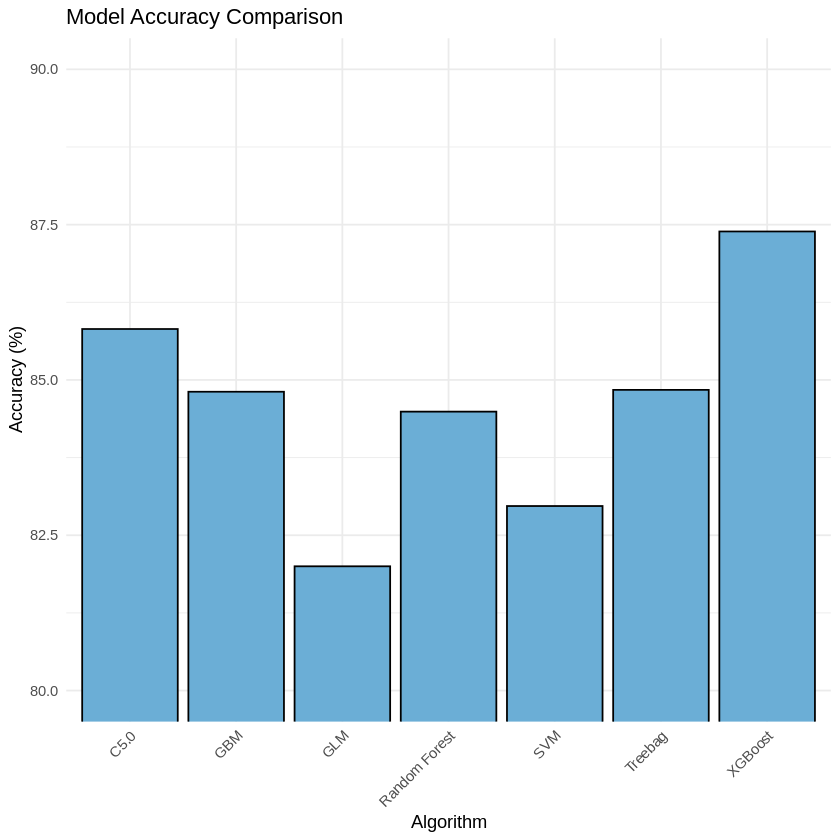

In [ ]:
library(ggplot2)

algorithms <- c("Treebag", "GBM", "C5.0", "SVM", "GLM", "XGBoost", "Random Forest")
accuracies <- c(84.84, 84.81, 85.82, 82.97, 82.00, 87.39, 84.49)

data <- data.frame(Algorithm = algorithms, Accuracy = accuracies)

ggplot(data, aes(x = Algorithm, y = Accuracy)) +
  geom_bar(stat = "identity", color = "black", fill = "#6BAED6", show.legend = FALSE) +
  coord_cartesian(ylim=c(80, 90)) +
  labs(title = "Model Accuracy Comparison",
       x = "Algorithm",
       y = "Accuracy (%)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))